# Retrieval and Preparation of San Francisco Traffic Data

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import wget
from datetime import datetime

In [2]:
matplotlib.rcParams['figure.figsize'] = [16, 9]
pd.options.display.max_columns = 999

## Load Data

Road occupancy rates (between 0 and 1) from 861 traffic sensors in San Francisco.

Source: https://github.com/laiguokun/multivariate-time-series-data/tree/master/traffic

In [3]:
url = 'https://github.com/laiguokun/multivariate-time-series-data/blob/master/traffic/traffic.txt.gz?raw=true'
wget.download(url)

100% [........................................................................] 29310512 / 29310512

'traffic.txt.gz'

In [4]:
!gzip -d traffic.txt.gz

In [5]:
df = pd.read_csv('traffic.txt', header=None)
df.columns = ['ts%s' % str(col+1) for col in df.columns]
df.head()

,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10,ts11,ts12,ts13,ts14,ts15,ts16,ts17,ts18,ts19,ts20,ts21,ts22,ts23,ts24,ts25,ts26,ts27,ts28,ts29,ts30,ts31,ts32,ts33,ts34,ts35,ts36,ts37,ts38,ts39,ts40,ts41,ts42,ts43,ts44,ts45,ts46,ts47,ts48,ts49,ts50,ts51,ts52,ts53,ts54,ts55,ts56,ts57,ts58,ts59,ts60,ts61,ts62,ts63,ts64,ts65,ts66,ts67,ts68,ts69,ts70,ts71,ts72,ts73,ts74,ts75,ts76,ts77,ts78,ts79,ts80,ts81,ts82,ts83,ts84,ts85,ts86,ts87,ts88,ts89,ts90,ts91,ts92,ts93,ts94,ts95,ts96,ts97,ts98,ts99,ts100,ts101,ts102,ts103,ts104,ts105,ts106,ts107,ts108,ts109,ts110,ts111,ts112,ts113,ts114,ts115,ts116,ts117,ts118,ts119,ts120,ts121,ts122,ts123,ts124,ts125,ts126,ts127,ts128,ts129,ts130,ts131,ts132,ts133,ts134,ts135,ts136,ts137,ts138,ts139,ts140,ts141,ts142,ts143,ts144,ts145,ts146,ts147,ts148,ts149,ts150,ts151,ts152,ts153,ts154,ts155,ts156,ts157,ts158,ts159,ts160,ts161,ts162,ts163,ts164,ts165,ts166,ts167,ts168,ts169,ts170,ts171,ts172,ts173,ts174,ts175,ts176,ts177,ts178,ts179,ts180,ts181,ts182,ts183,ts184,ts185,ts186,ts187,ts188,ts189,ts190,ts191,ts192,ts193,ts194,ts195,ts196,ts197,ts198,ts199,ts200,ts201,ts202,ts203,ts204,ts205,ts206,ts207,ts208,ts209,ts210,ts211,ts212,ts213,ts214,ts215,ts216,ts217,ts218,ts219,ts220,ts221,ts222,ts223,ts224,ts225,ts226,ts227,ts228,ts229,ts230,ts231,ts232,ts233,ts234,ts235,ts236,ts237,ts238,ts239,ts240,ts241,ts242,ts243,ts244,ts245,ts246,ts247,ts248,ts249,ts250,ts251,ts252,ts253,ts254,ts255,ts256,ts257,ts258,ts259,ts260,ts261,ts262,ts263,ts264,ts265,ts266,ts267,ts268,ts269,ts270,ts271,ts272,ts273,ts274,ts275,ts276,ts277,ts278,ts279,ts280,ts281,ts282,ts283,ts284,ts285,ts286,ts287,ts288,ts289,ts290,ts291,ts292,ts293,ts294,ts295,ts296,ts297,ts298,ts299,ts300,ts301,ts302,ts303,ts304,ts305,ts306,ts307,ts308,ts309,ts310,ts311,ts312,ts313,ts314,ts315,ts316,ts317,ts318,ts319,ts320,ts321,ts322,ts323,ts324,ts325,ts326,ts327,ts328,ts329,ts330,ts331,ts332,ts333,ts334,ts335,ts336,ts337,ts338,ts339,ts340,ts341,ts342,ts343,ts344,ts345,ts346,ts347,ts348,ts349,ts350,ts351,ts352,ts353,ts354,ts355,ts356,ts357,ts358,ts359,ts360,ts361,ts362,ts363,ts364,ts365,ts366,ts367,ts368,ts369,ts370,ts371,ts372,ts373,ts374,ts375,ts376,ts377,ts378,ts379,ts380,ts381,ts382,ts383,ts384,ts385,ts386,ts387,ts388,ts389,ts390,ts391,ts392,ts393,ts394,ts395,ts396,ts397,ts398,ts399,ts400,ts401,ts402,ts403,ts404,ts405,ts406,ts407,ts408,ts409,ts410,ts411,ts412,ts413,ts414,ts415,ts416,ts417,ts418,ts419,ts420,ts421,ts422,ts423,ts424,ts425,ts426,ts427,ts428,ts429,ts430,ts431,ts432,ts433,ts434,ts435,ts436,ts437,ts438,ts439,ts440,ts441,ts442,ts443,ts444,ts445,ts446,ts447,ts448,ts449,ts450,ts451,ts452,ts453,ts454,ts455,ts456,ts457,ts458,ts459,ts460,ts461,ts462,ts463,ts464,ts465,ts466,ts467,ts468,ts469,ts470,ts471,ts472,ts473,ts474,ts475,ts476,ts477,ts478,ts479,ts480,ts481,ts482,ts483,ts484,ts485,ts486,ts487,ts488,ts489,ts490,ts491,ts492,ts493,ts494,ts495,ts496,ts497,ts498,ts499,ts500,ts501,ts502,ts503,ts504,ts505,ts506,ts507,ts508,ts509,ts510,ts511,ts512,ts513,ts514,ts515,ts516,ts517,ts518,ts519,ts520,ts521,ts522,ts523,ts524,ts525,ts526,ts527,ts528,ts529,ts530,ts531,ts532,ts533,ts534,ts535,ts536,ts537,ts538,ts539,ts540,ts541,ts542,ts543,ts544,ts545,ts546,ts547,ts548,ts549,ts550,ts551,ts552,ts553,ts554,ts555,ts556,ts557,ts558,ts559,ts560,ts561,ts562,ts563,ts564,ts565,ts566,ts567,ts568,ts569,ts570,ts571,ts572,ts573,ts574,ts575,ts576,ts577,ts578,ts579,ts580,ts581,ts582,ts583,ts584,ts585,ts586,ts587,ts588,ts589,ts590,ts591,ts592,ts593,ts594,ts595,ts596,ts597,ts598,ts599,ts600,ts601,ts602,ts603,ts604,ts605,ts606,ts607,ts608,ts609,ts610,ts611,ts612,ts613,ts614,ts615,ts616,ts617,ts618,ts619,ts620,ts621,ts622,ts623,ts624,ts625,ts626,ts627,ts628,ts629,ts630,ts631,ts632,ts633,ts634,ts635,ts636,ts637,ts638,ts639,ts640,ts641,ts642,ts643,ts644,ts645,ts646,ts647,ts648,ts649,ts650,ts651,ts652,ts653,ts654,ts655,ts656,ts657,ts658,ts659,ts660,ts661,ts662,ts663,ts664,ts665,ts666,ts667,ts668,ts669,ts670,ts671,ts672,ts673,ts674,ts675,ts676,ts677,ts678,ts679,ts680,ts681,ts682,ts683,ts684,ts6

Add in datetime index (data source says data corresponds to 48 months over 2015-2016).

In [6]:
df.index = pd.DatetimeIndex(freq='H', start=datetime(2015, 1, 1), periods=len(df))
df.index.name = 'DateTime'
df.head()

,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10,ts11,ts12,ts13,ts14,ts15,ts16,ts17,ts18,ts19,ts20,ts21,ts22,ts23,ts24,ts25,ts26,ts27,ts28,ts29,ts30,ts31,ts32,ts33,ts34,ts35,ts36,ts37,ts38,ts39,ts40,ts41,ts42,ts43,ts44,ts45,ts46,ts47,ts48,ts49,ts50,ts51,ts52,ts53,ts54,ts55,ts56,ts57,ts58,ts59,ts60,ts61,ts62,ts63,ts64,ts65,ts66,ts67,ts68,ts69,ts70,ts71,ts72,ts73,ts74,ts75,ts76,ts77,ts78,ts79,ts80,ts81,ts82,ts83,ts84,ts85,ts86,ts87,ts88,ts89,ts90,ts91,ts92,ts93,ts94,ts95,ts96,ts97,ts98,ts99,ts100,ts101,ts102,ts103,ts104,ts105,ts106,ts107,ts108,ts109,ts110,ts111,ts112,ts113,ts114,ts115,ts116,ts117,ts118,ts119,ts120,ts121,ts122,ts123,ts124,ts125,ts126,ts127,ts128,ts129,ts130,ts131,ts132,ts133,ts134,ts135,ts136,ts137,ts138,ts139,ts140,ts141,ts142,ts143,ts144,ts145,ts146,ts147,ts148,ts149,ts150,ts151,ts152,ts153,ts154,ts155,ts156,ts157,ts158,ts159,ts160,ts161,ts162,ts163,ts164,ts165,ts166,ts167,ts168,ts169,ts170,ts171,ts172,ts173,ts174,ts175,ts176,ts177,ts178,ts179,ts180,ts181,ts182,ts183,ts184,ts185,ts186,ts187,ts188,ts189,ts190,ts191,ts192,ts193,ts194,ts195,ts196,ts197,ts198,ts199,ts200,ts201,ts202,ts203,ts204,ts205,ts206,ts207,ts208,ts209,ts210,ts211,ts212,ts213,ts214,ts215,ts216,ts217,ts218,ts219,ts220,ts221,ts222,ts223,ts224,ts225,ts226,ts227,ts228,ts229,ts230,ts231,ts232,ts233,ts234,ts235,ts236,ts237,ts238,ts239,ts240,ts241,ts242,ts243,ts244,ts245,ts246,ts247,ts248,ts249,ts250,ts251,ts252,ts253,ts254,ts255,ts256,ts257,ts258,ts259,ts260,ts261,ts262,ts263,ts264,ts265,ts266,ts267,ts268,ts269,ts270,ts271,ts272,ts273,ts274,ts275,ts276,ts277,ts278,ts279,ts280,ts281,ts282,ts283,ts284,ts285,ts286,ts287,ts288,ts289,ts290,ts291,ts292,ts293,ts294,ts295,ts296,ts297,ts298,ts299,ts300,ts301,ts302,ts303,ts304,ts305,ts306,ts307,ts308,ts309,ts310,ts311,ts312,ts313,ts314,ts315,ts316,ts317,ts318,ts319,ts320,ts321,ts322,ts323,ts324,ts325,ts326,ts327,ts328,ts329,ts330,ts331,ts332,ts333,ts334,ts335,ts336,ts337,ts338,ts339,ts340,ts341,ts342,ts343,ts344,ts345,ts346,ts347,ts348,ts349,ts350,ts351,ts352,ts353,ts354,ts355,ts356,ts357,ts358,ts359,ts360,ts361,ts362,ts363,ts364,ts365,ts366,ts367,ts368,ts369,ts370,ts371,ts372,ts373,ts374,ts375,ts376,ts377,ts378,ts379,ts380,ts381,ts382,ts383,ts384,ts385,ts386,ts387,ts388,ts389,ts390,ts391,ts392,ts393,ts394,ts395,ts396,ts397,ts398,ts399,ts400,ts401,ts402,ts403,ts404,ts405,ts406,ts407,ts408,ts409,ts410,ts411,ts412,ts413,ts414,ts415,ts416,ts417,ts418,ts419,ts420,ts421,ts422,ts423,ts424,ts425,ts426,ts427,ts428,ts429,ts430,ts431,ts432,ts433,ts434,ts435,ts436,ts437,ts438,ts439,ts440,ts441,ts442,ts443,ts444,ts445,ts446,ts447,ts448,ts449,ts450,ts451,ts452,ts453,ts454,ts455,ts456,ts457,ts458,ts459,ts460,ts461,ts462,ts463,ts464,ts465,ts466,ts467,ts468,ts469,ts470,ts471,ts472,ts473,ts474,ts475,ts476,ts477,ts478,ts479,ts480,ts481,ts482,ts483,ts484,ts485,ts486,ts487,ts488,ts489,ts490,ts491,ts492,ts493,ts494,ts495,ts496,ts497,ts498,ts499,ts500,ts501,ts502,ts503,ts504,ts505,ts506,ts507,ts508,ts509,ts510,ts511,ts512,ts513,ts514,ts515,ts516,ts517,ts518,ts519,ts520,ts521,ts522,ts523,ts524,ts525,ts526,ts527,ts528,ts529,ts530,ts531,ts532,ts533,ts534,ts535,ts536,ts537,ts538,ts539,ts540,ts541,ts542,ts543,ts544,ts545,ts546,ts547,ts548,ts549,ts550,ts551,ts552,ts553,ts554,ts555,ts556,ts557,ts558,ts559,ts560,ts561,ts562,ts563,ts564,ts565,ts566,ts567,ts568,ts569,ts570,ts571,ts572,ts573,ts574,ts575,ts576,ts577,ts578,ts579,ts580,ts581,ts582,ts583,ts584,ts585,ts586,ts587,ts588,ts589,ts590,ts591,ts592,ts593,ts594,ts595,ts596,ts597,ts598,ts599,ts600,ts601,ts602,ts603,ts604,ts605,ts606,ts607,ts608,ts609,ts610,ts611,ts612,ts613,ts614,ts615,ts616,ts617,ts618,ts619,ts620,ts621,ts622,ts623,ts624,ts625,ts626,ts627,ts628,ts629,ts630,ts631,ts632,ts633,ts634,ts635,ts636,ts637,ts638,ts639,ts640,ts641,ts642,ts643,ts644,ts645,ts646,ts647,ts648,ts649,ts650,ts651,ts652,ts653,ts654,ts655,ts656,ts657,ts658,ts659,ts660,ts661,ts662,ts663,ts664,ts665,ts666,ts667,ts668,ts669,ts670,ts671,ts672,ts673,ts674,ts675,ts676,ts677,ts678,ts679,ts680,ts681,ts682,ts683,ts684,ts6

In [7]:
# No missing values
df.isnull().any().all() == False

True

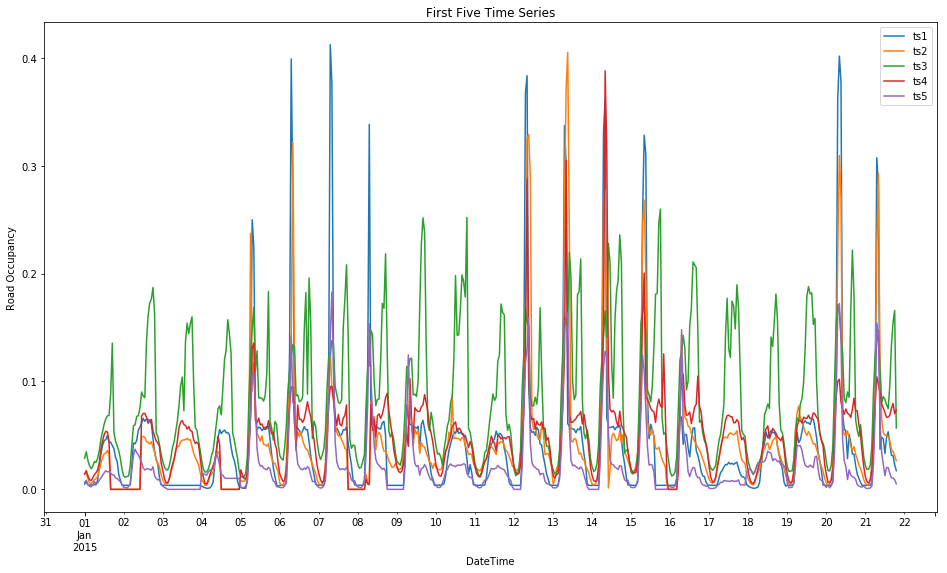

In [8]:
for col in df.columns[:5]:
    df[col][:500].plot()
plt.legend()
plt.title("First Five Time Series")
plt.ylabel("Road Occupancy");

# Save Data

In [9]:
!rm traffic.txt

In [10]:
df.to_csv('san-francisco-traffic.csv')